In [3]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split


In [4]:
X = joblib.load("data/inputs.pkl")

y_class = joblib.load("data/y_class.pkl")
y_score = joblib.load("data/y_score.pkl")

X.shape



(4112, 5029)

In [5]:
X_train, X_test, y_class_train, y_class_test, y_score_train, y_score_test = train_test_split(
    X,
    y_class,
    y_score,
    test_size=0.2,
    random_state=42,

)


In [6]:
X_train.shape

(3289, 5029)

In [7]:
import numpy as np

y_train_log = np.log1p(y_score_train)
y_test_log = np.log1p(y_score_test)


In [8]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)

reg.fit(X_train, y_score_train)


RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=42)

In [9]:
y_pred = reg.predict(X_test)



In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_score_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_score_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 1.68
RMSE: 2.03


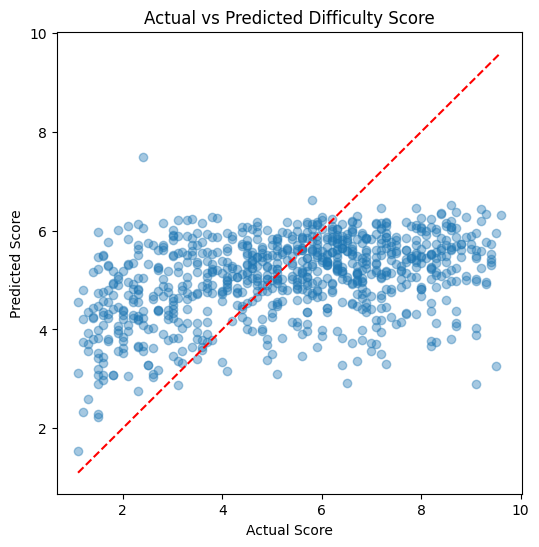

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_score_test, y_pred, alpha=0.4)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Difficulty Score")
plt.plot([y_score_test.min(), y_score_test.max()],
         [y_score_test.min(), y_score_test.max()],
         "r--")
plt.show()


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

reg2 = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

reg2.fit(X_train, y_score_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300,
                          random_state=42)

In [16]:
y_pred = reg2.predict(X_test)


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_score_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_score_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 1.69
RMSE: 2.04


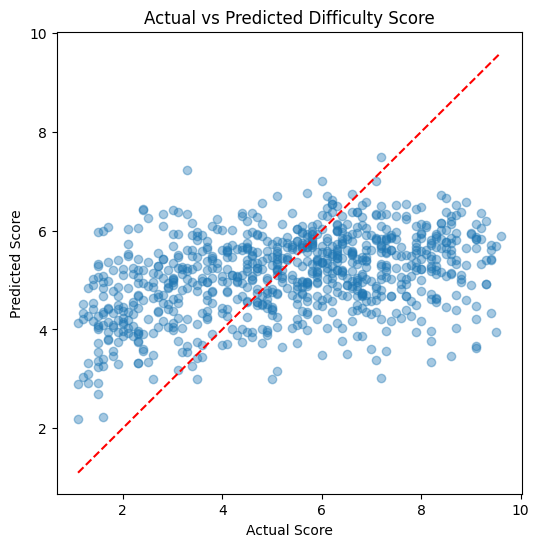

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_score_test, y_pred, alpha=0.4)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Difficulty Score")
plt.plot([y_score_test.min(), y_score_test.max()],
         [y_score_test.min(), y_score_test.max()],
         "r--")
plt.show()


In [19]:
joblib.dump(reg,"models/regressor.pkl")


['models/regressor.pkl']